In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
data_path = '../data/cleaned_usa_real_estate.csv'
df = pd.read_csv(data_path)  

In [2]:
# Sample 0.5% of the data
df_sample = df.sample(frac=0.005, random_state=42)  

In [3]:
# Display basic information
df_sample.info()  

# Display basic statistics
df_sample.describe()  

<class 'pandas.core.frame.DataFrame'>
Index: 11132 entries, 1696936 to 1032420
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     11132 non-null  float64
 1   status          11132 non-null  object 
 2   price           11132 non-null  float64
 3   bed             11132 non-null  float64
 4   bath            11132 non-null  float64
 5   acre_lot        11132 non-null  float64
 6   street          11062 non-null  float64
 7   city            11132 non-null  object 
 8   state           11132 non-null  object 
 9   zip_code        11132 non-null  float64
 10  house_size      11132 non-null  float64
 11  prev_sold_date  7440 non-null   object 
 12  total_rooms     11132 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.2+ MB


,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size,total_rooms
count,11132.000000,1.113200e+04,11132.000000,11132.000000,11132.000000,1.106200e+04,11132.000000,11132.000000,11132.000000
mean,53119.965774,5.139970e+05,3.202659,2.371272,9.533876,1.014096e+06,51744.323931,1956.760151,5.573931
std,30643.348632,1.013524e+06,1.074563,1.063120,428.548371,5.838105e+05,28961.193445,993.180301,1.936095
min,8.000000,1.000000e+00,1.000000,1.000000,0.000000,3.700000e+01,603.000000,130.000000,2.000000
25%,24196.000000,1.650000e+05,3.000000,2.000000,0.170000,5.174485e+05,29498.750000,1472.000000,5.000000
50%,52953.500000,3.250000e+05,3.000000,2.000000,0.260000,1.012967e+06,47725.000000,1760.000000,5.000000
75%,79137.500000,5.528850e+05,4.000000,3.000000,0.690000,1.525803e+06,77583.000000,2157.250000,6.000000
max,110133.000000,4.950000e+07,30.000000,30.000000,43560.000000,2.001187e+06,99712.000000,19998.000000,60.000000


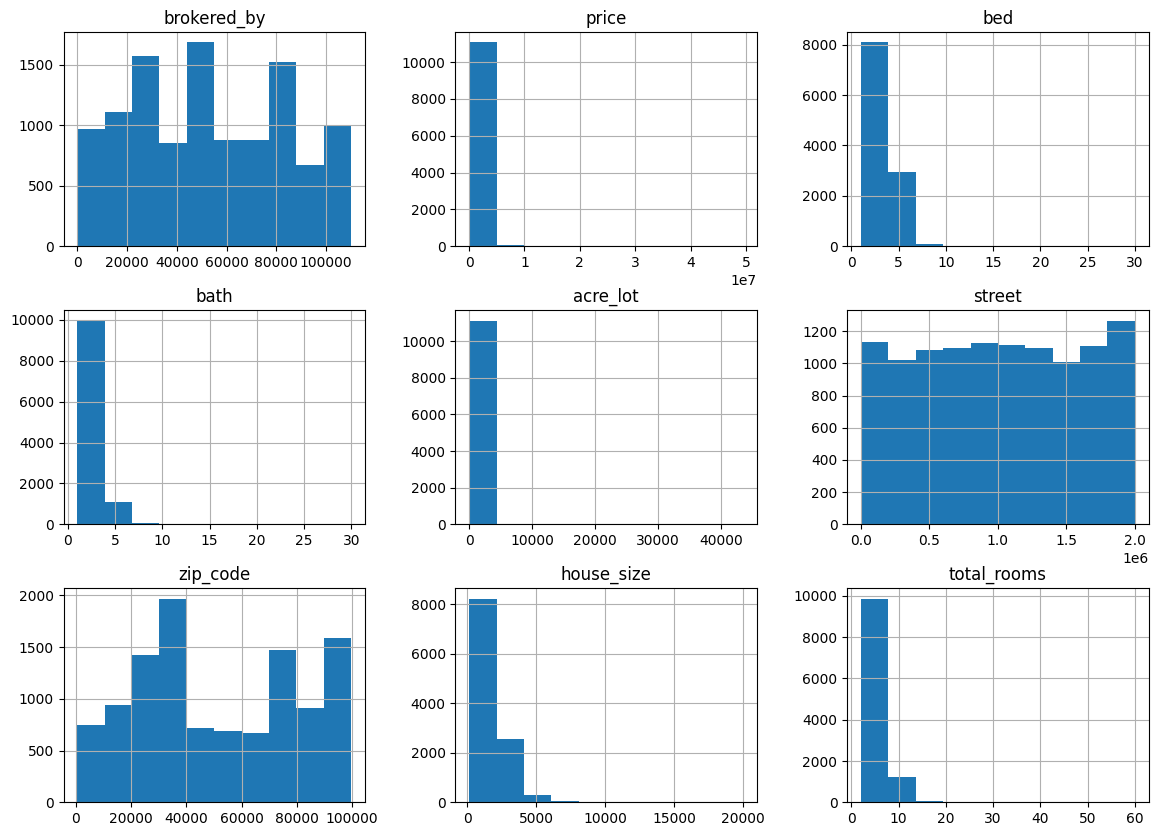

In [4]:
# Visualize distributions of numeric columns
df_sample.hist(figsize=(14, 10)) 
plt.show()

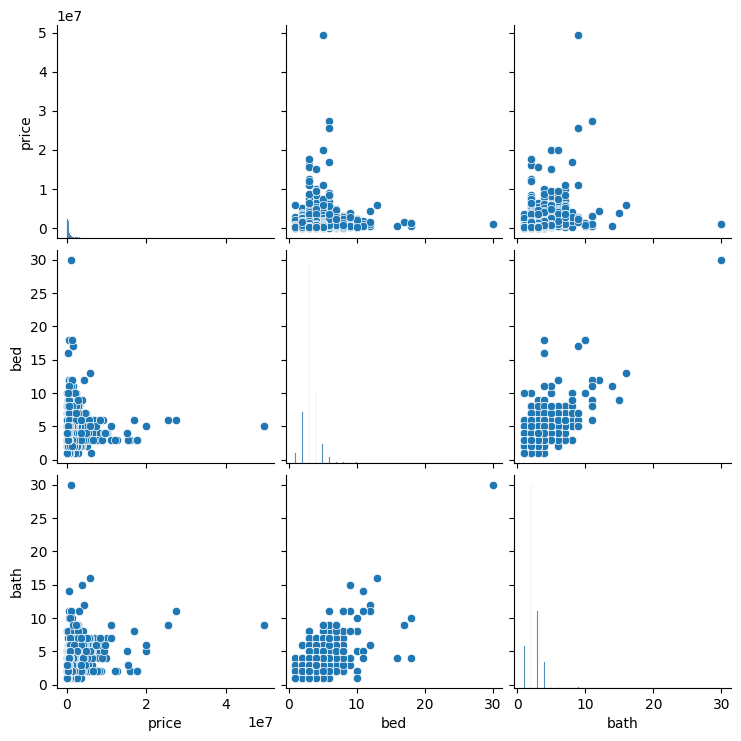

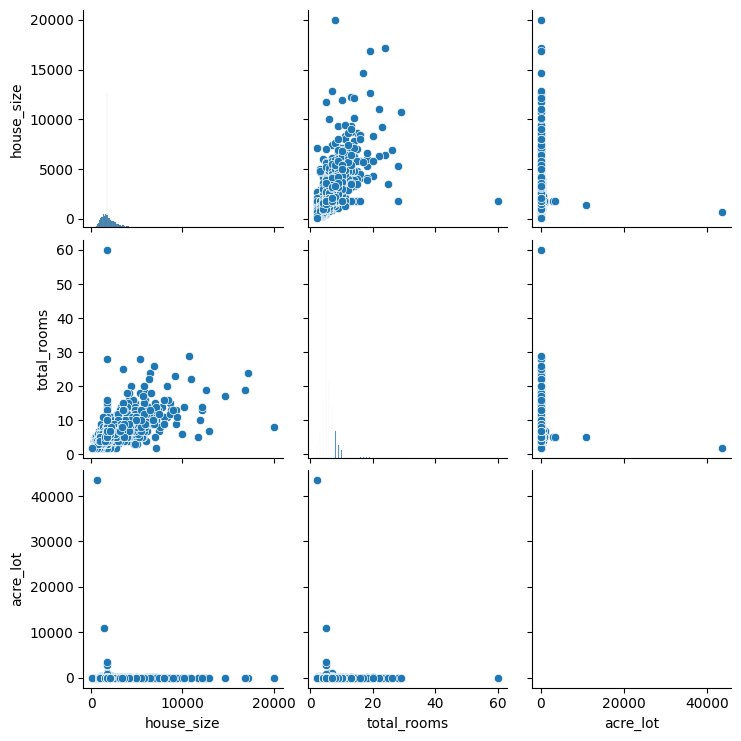

In [5]:
# Subsets  of columns for the pair plot
# Subset 1
selected_columns_1 = ['price', 'bed', 'bath']
sns.pairplot(df_sample[selected_columns_1])
plt.show()

# Subset 2
selected_columns_2 = ['house_size', 'total_rooms', 'acre_lot']
sns.pairplot(df_sample[selected_columns_2])
plt.show()

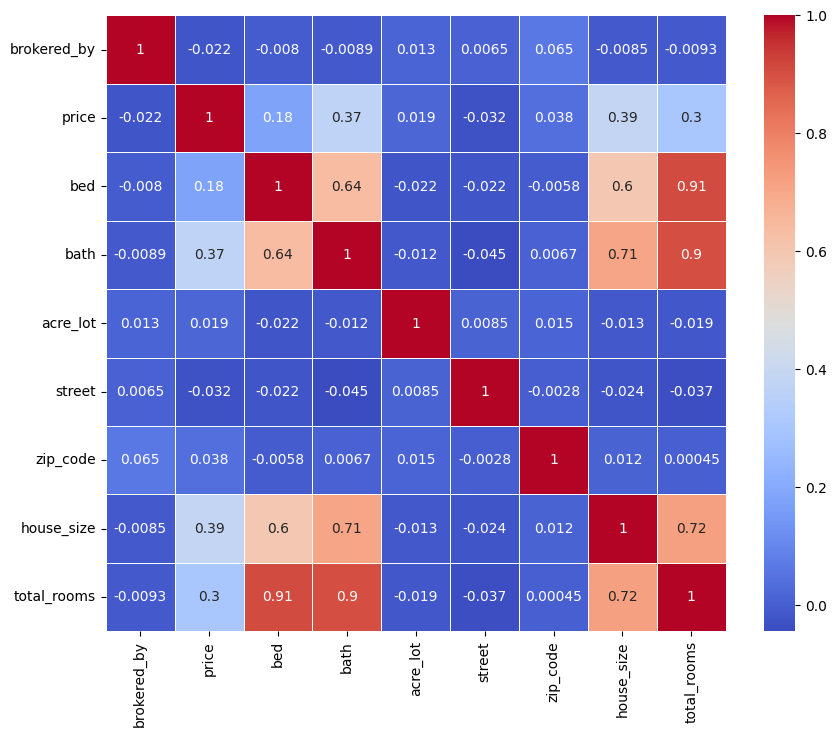

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_cols = df_sample.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df_sample[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [10]:
# Handle missing values

# Drop 'prev_sold_date' column
df_sample_cleaned = df_sample.drop(columns=['prev_sold_date'])

# Ensure 'street' is of type 'object'
df_sample_cleaned['street'] = df_sample_cleaned['street'].astype('object')

# Impute missing values in 'street' with 'Unknown'
df_sample_cleaned['street'] = df_sample_cleaned['street'].fillna('Unknown')

# Verify that missing values have been handled
df_sample_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11132 entries, 1696936 to 1032420
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brokered_by  11132 non-null  float64
 1   status       11132 non-null  object 
 2   price        11132 non-null  float64
 3   bed          11132 non-null  float64
 4   bath         11132 non-null  float64
 5   acre_lot     11132 non-null  float64
 6   street       11132 non-null  object 
 7   city         11132 non-null  object 
 8   state        11132 non-null  object 
 9   zip_code     11132 non-null  float64
 10  house_size   11132 non-null  float64
 11  total_rooms  11132 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.1+ MB


In [11]:
import numpy as np

# Apply log transformation to skewed features
df_sample_cleaned['price_log'] = np.log1p(df_sample_cleaned['price'])
df_sample_cleaned['acre_lot_log'] = np.log1p(df_sample_cleaned['acre_lot'])
df_sample_cleaned['house_size_log'] = np.log1p(df_sample_cleaned['house_size'])
df_sample_cleaned['bed_log'] = np.log1p(df_sample_cleaned['bed'])
df_sample_cleaned['bath_log'] = np.log1p(df_sample_cleaned['bath'])
df_sample_cleaned['total_rooms_log'] = np.log1p(df_sample_cleaned['total_rooms'])

# Verify the transformation
df_sample_cleaned[['price', 'price_log', 'acre_lot', 'acre_lot_log', 'house_size', 'house_size_log', 'bed', 'bed_log', 'bath', 'bath_log', 'total_rooms', 'total_rooms_log']].head()

,price,price_log,acre_lot,acre_lot_log,house_size,house_size_log,bed,bed_log,bath,bath_log,total_rooms,total_rooms_log
1696936,169900.0,12.042971,1.66,0.978326,1760.0,7.473637,3.0,1.386294,2.0,1.098612,5.0,1.791759
2092671,2200000.0,14.603968,17.42,2.913437,1760.0,7.473637,3.0,1.386294,2.0,1.098612,5.0,1.791759
742044,209900.0,12.254391,0.50,0.405465,1733.0,7.458186,3.0,1.386294,2.0,1.098612,5.0,1.791759
1424136,239900.0,12.387982,0.26,0.231112,1137.0,7.037028,2.0,1.098612,2.0,1.098612,4.0,1.609438
812329,439000.0,12.992257,0.28,0.246860,3536.0,8.171034,4.0,1.609438,3.0,1.386294,7.0,2.079442
